### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---
#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---


#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---


#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---


#### Entrega:

Comparta el enlace de su notebook en su repositorio de GitHub, asegurándose de que los resultados de la ejecución de las celdas (gráficas, impresiones) sean visibles.

#### Parte 1: Análisis del sistema base.

Función de Transferencia G_lc (lazo cerrado):
<TransferFunction>: sys[60]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10


Polos de la función:
[-3.+1.j -3.-1.j]



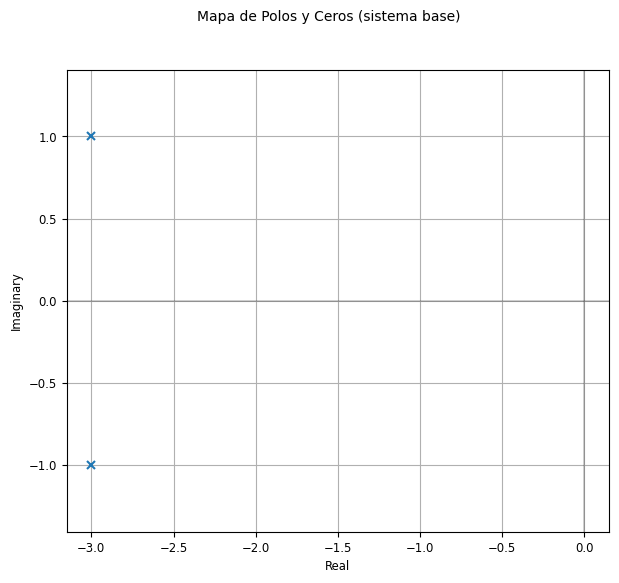

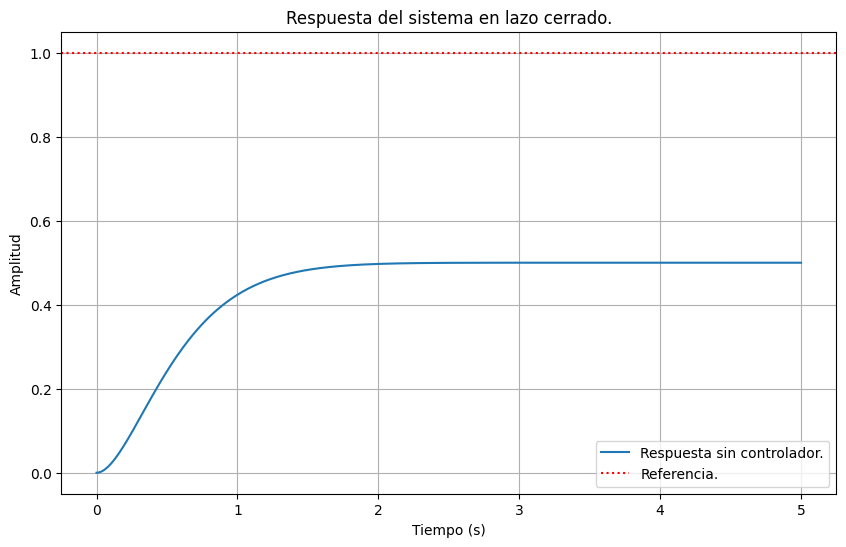

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [10]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definición de la planta Gp(s). ---
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
G_lc = ct.feedback(Gp, 1)
print("Función de Transferencia G_lc (lazo cerrado):")
print(G_lc)
print("")
print("")
print("Polos de la función:")
print(ct.poles(G_lc))
print("")

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(G_lc, title='Mapa de Polos y Ceros (sistema base)')
plt.grid(True)
plt.show()

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t, y_base = ct.step_response(G_lc, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(G_lc)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

#### Parte 2: Proceso de diseño del PID.

En una primera prueba se eligieron los siguientes valores Kp=50, Ki=8 y Kd=4, considerando que se requiere reducir el tiempo de establecimiento (por eso se elige un valor alto para Kp) y el error en estado estacionario. Se obtuvieron las siguientes métricas: 
  - Sobreimpulso (Overshoot): 6.85%
  - Tiempo de Establecimiento (SettlingTime): 12.09 s
  - Valor final: 1.0593
  - Error en estado estacionario (1 - valor_final): -0.0593

Las cuales no cumplen aún con los requerimientos necesarios, Error en estado estacionario: Cero, Sobreimpulso (Overshoot): Menor al 5 % y Tiempo de establecimiento (al 2 %): Menor a 1.0 segundos.

Al aumentar Kd, se reduce el sobreimpulso, por ello hacemos una segunda prueba incrementando este. Kp=50, Ki=8 y Kd=8.
Obteniendo las métricas que se muestran a continuación.
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de Establecimiento (SettlingTime): 0.10 s
  - Valor final: 0.9925
  - Error en estado estacionario (1 - valor_final): 0.0075

Se puede observar que aún se necesita disminuir el error, por ello aumentamos Kd y Ki de la siguiente manera, Kp=50, Ki=30 y Kd=20. Así se obtuvo:

Métricas de desempeño del sistema con controlador Proporcional-Integral-Derivativo:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de Establecimiento (SettlingTime): nan s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): 0.0000

Cumpliendo satisfactoriamente los criterios solicitados.


#### Parte 3: Implementación del controlador PID sintonizado.

Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Integral-Derivativo:
<TransferFunction>: sys[277]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     100 s^2 + 250 s + 150
  ---------------------------
  s^3 + 106 s^2 + 255 s + 150


Polos de la función:
[-103.55144464+0.j   -1.44855536+0.j   -1.        +0.j]


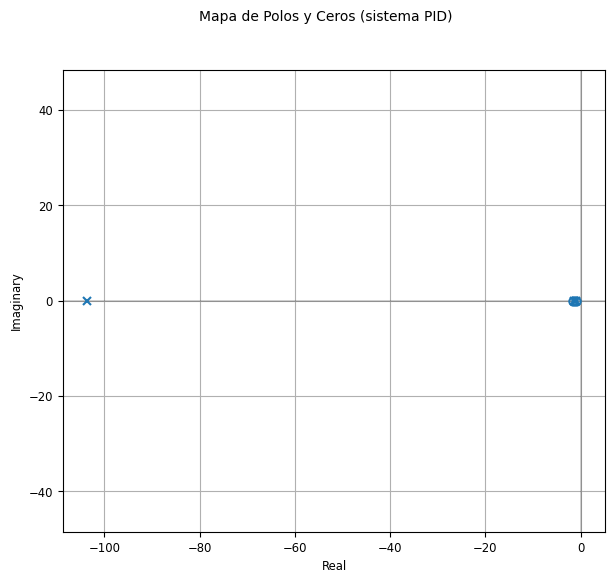

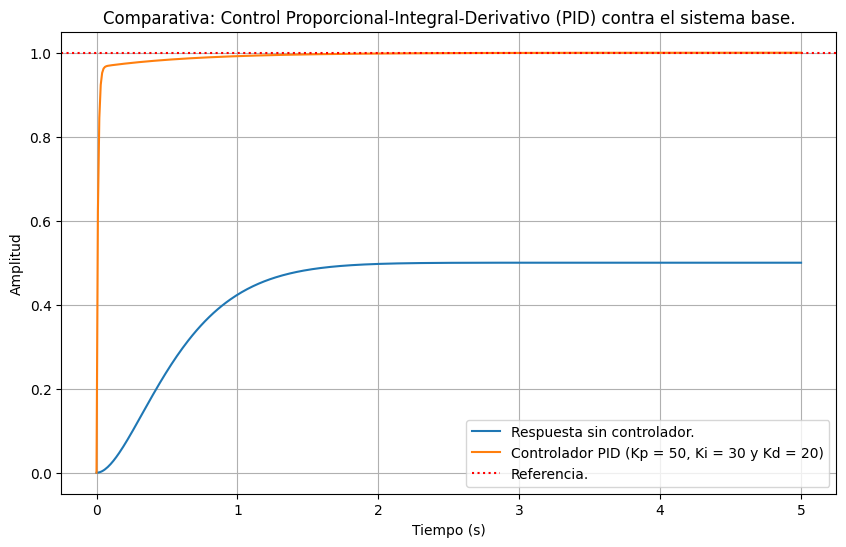

Métricas de desempeño del sistema con controlador Proporcional-Integral-Derivativo:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de Establecimiento (SettlingTime): nan s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): 0.0000


In [41]:
# --- Parámetros del controlador Proporcional-Integral-Derivativo. ---
Kp_pid = 50
Ki_pid = 30
Kd = 20

# --- Creación del controlador PID. ---
# El numerador es [Kd, Kp, Ki] y el denominador es [0, 1, 0] (representando 1/s).
Gc_PID = ct.tf([Kd, Kp_pid, Ki_pid], [0, 1, 0])

# --- Sistema en lazo cerrado con controlador PID. ---
sistema_PID = ct.feedback(Gc_PID * Gp, 1)
print("Función de Transferencia del sistema de lazo cerrado con controlador Proporcional-Integral-Derivativo:")
print(sistema_PID)
print("")
print("")
print("Polos de la función:")
print(ct.poles(sistema_PID))

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_PID, title='Mapa de Polos y Ceros (sistema PID)')
plt.grid(True)
plt.show()

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 5, 501)
t, y_PID = ct.step_response(sistema_PID, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_PID, label=f"Controlador PID (Kp = {Kp_pid}, Ki = {Ki_pid} y Kd = {Kd})")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional-Integral-Derivativo (PID) contra el sistema base.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador Proporcional-Integral-Derivativo:")
info = ct.step_info(sistema_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de Establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")